### Imports

In [1]:
# Import matplotlib
import matplotlib.pyplot as plt
# Import networkx
import networkx as nx
# Import math for mathematical calculations
import math
# Numerical and random functions.
import numpy as np
#Importing timer to track how long it takes an algorithm to complete
from timeit import default_timer as timer

# Introduction

## What is Heap Sort?

Heap sort is a sorting algorithm based on the binary heap data structure. Sorting is a process of arranging entities in a particular order, i.e. ascending, descending, or alphabetical order. 

Data structure sorting is concerned with the arrangement of data. There are different sorting algorithms that depend on various factors like data structure, complexity, etc. One of the popular sorting algorithms that we are going to discuss here is the Heap Sort.

In order to fully understand how heap sort works, we first have to understand a **binary heap** and subsequently, a **binary tree**.



### Binary tree

A binary tree is a tree-type non-linear data structure with a maximum of two children for each parent. Every node in a binary tree has a left and right reference along with the data element. The node at the top of the hierarchy of a tree is called the root node. The nodes that hold other sub-nodes are the parent nodes.


[![Binary-Tree1.png](https://i.postimg.cc/B6YMrPz4/Binary-Tree1.png)](https://postimg.cc/tZ63PJyM)

The following are the important terms with respect to Binary trees:

- **Path** - Path refers to the sequence of nodes along the edges of a tree.
- **Root** - The node at the top of the tree is called root. There is only one root per tree and one path from the root node to any node.
- **Parent Node** − Any node except the root node has one edge upward to a node called parent.
- **Child Node** − The node below a given node connected by its edge downward is called its child node.
- **Leaf Node** − The node which does not have any child node is called the leaf node.
- **Sub-tree** − Subtree represents the descendants of a node.


### Binary heap
A binary heap is simply a complete binary tree, in which each level of the tree (except, perhaps, the last level) is completely filled and all nodes are stored starting from the left to right. 

A binary heap also takes into account how the values are stored. Either the value of the parent node is always greater than the value of its children (called a max heap), or vice versa, where the value of the parent is smaller than that of its children (called a min heap). 


<b>Reference- https://www.tutorialspoint.com/data_structures_algorithms/tree_data_structure.htm<b>
<br>
<hr>

## Visual illustration
We can use the following libraries to illustrate a set of nodes in the form of a Binary Tree

1. **matplotlib.pyplot** - The pyplot functions allow us to make some change to a figure. For example to creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, etc.
2. **networkx** - A package for providing further aid in the creation and manipulation of complex networks

The below code show an implementation of visualing plotting a list of numbers into a binary tree structure

[1, 4, 68, 37, 10, 6, 39, 12, 5]


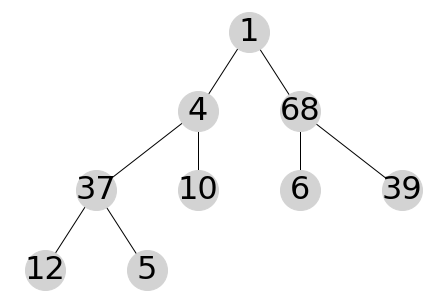

In [2]:
def drawtree(L, highlight=None):
    
  # Create a balanced binary tree
  T = nx.balanced_tree(2, math.floor(math.log(len(L), 2)))
    
  # Remove nodes beyond the length of L
  T.remove_nodes_from(list(T.nodes)[len(L):])
    
  # Rename nodes within L
  T = nx.relabel_nodes(T, dict(zip(T.nodes, L)), copy=True)
    
  # Get positions for the nodes
  pos = nx.drawing.nx_pydot.graphviz_layout(T, prog="dot")
    
  # Draw the graph
  nx.draw(T, pos, with_labels=True, node_color='lightgrey', node_size=1600, font_size=32)
    
  # Highlight nodes where needed
  if highlight:
    nx.draw_networkx(T.subgraph([i for i in T.nodes if i in highlight]), pos=pos, node_color='pink', node_size=1600, font_size=32)

L = [1,4,68,37,10,6,39,12,5]

# Print the list
print(L)

# Draw the tree from list L
drawtree(L)

<b>Credit - Dr. Ian McLoughlin<b>
<br>
<hr>


# Implementation of Heap Sort
The heap sort algorithm has two main steps:

1. **Build a max heap from the available data points.**
2. **Switch the root node with the last node, and remove it from the heap.** 

(Repeat these two steps until there is only one element is remaining). 




## Step 1: Build a max heap from the data.

In order to create a max heap, we must compare the value of a parent node with its children. If the value of the child is greater than the parent, then swap them. This process is repeated until all parent nodes have a greater value than their children. So how do we first locate the children of a parent node?



Identifying the index of a parent nodes children is done using the following logic:

* The index ( 2 * i )+1 will return the index of the left child. Where i represents the index of the parent.
<br>
    
* The index ( 2 * i )+2 will return the index of the right child. Where i represents the index of the parent.
<br>

Using the above plot, lets say we want to get the index of the left child, of the parent node at index 3(value of 37):

> 2*3 +1 = 7
Hence, the index of the left child should be at index 7 which has a value of <b>12<b>

Now lets do the same for the right child :

>2*3 +2 = 8
Hence, the index of the left child should be at index 8 which has a value of <b>5<b>


We can highlight those two nodes for ease of visualisation

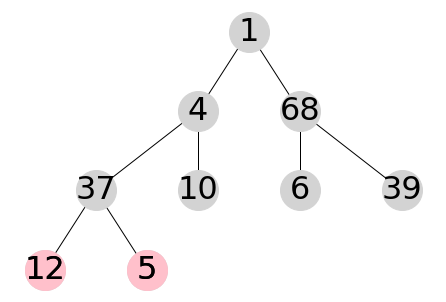

In [3]:
# Draw the tree from list L
drawtree(L,[12,5])

The video below shows the process of creating a binary tree from an list of nodes. Then, the binary tree is sorted into a max heap. 


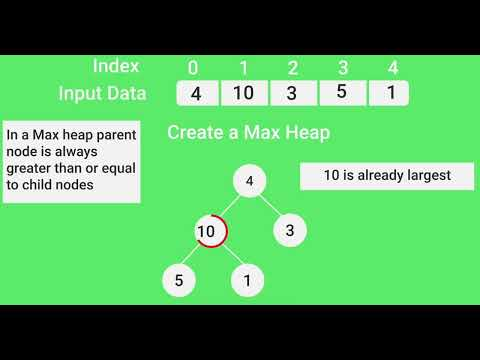

In [4]:
from IPython.display import YouTubeVideo
id='yehkKyDFIw0'
YouTubeVideo(id=id,width=800,height=500)

<b>Reference - I created an edited version from the following original video https://www.youtube.com/watch?v=MtQL_ll5KhQ&t=10s <b>

## Heap Sort Code Implementation 

In [5]:
## Heapify is the process of creating a heap data structure from a binary tree through
# recursive operations of sorting existing elements.
def heapify(arr, n, root):
         
        # Find largest element among root and children
        largest = root
        
        # Find the left and right children of the root.
        leftChild = 2 * root + 1
        rightChild = 2 * root + 2
        
        # check if the left child of the root exists and if it is greater than root 
        if leftChild < n and arr[root] < arr[leftChild]:
            largest = leftChild

        # check if the right child of the root exists and is it is greater than root 
        if rightChild < n and arr[largest] < arr[rightChild]:
            largest = rightChild

        # If the root is not the largest, swap it with largest
        if (largest != root):
            arr[root], arr[largest] = arr[largest], arr[root]            
            # Heapify the root. 
            heapify(arr, n, largest)
  

In [6]:
# HeapSort() calls heapify() within a single for loop. The end 
# result will be a max heap. 

def heapSort(arr): 
    # First, we need to get the size(length) of the list being passed down
    n = len(arr) 
  
    # Itterate through the elements and heapify them. The resulting list of elements will be sorted
    # in a max heap fashion.
    for i in range(n, -1, -1): 
        heapify(arr, n, i) 

<b>Reference - https://coderslegacy.com/python/heap-sort-algorithm/ & Dr. Ian McLoughlin

### Driver Code:

In [7]:
arr = [1,4,68,37,10,6,39,12,5]
n = len(arr)

# Iterating through the list and printing out each elements value
print("Binary Tree:")
for i in range(n):
    print("%d " % arr[i], end='')

# Creating Max Heap from existing list of elements
heapSort(arr)

# Iterating through the list and printing out each elements value
print("\n\nMax Heap:")
for i in range(n):
    print("%d " % arr[i], end='')

Binary Tree:
1 4 68 37 10 6 39 12 5 

Max Heap:
68 37 39 12 10 6 1 4 5 

<b>
______________________________________________________________________________________________________________________________________________


At this point, the binary heap has been converted into a max heap. We can clearly see the difference below, where in the second plotting every parent is greater than it children

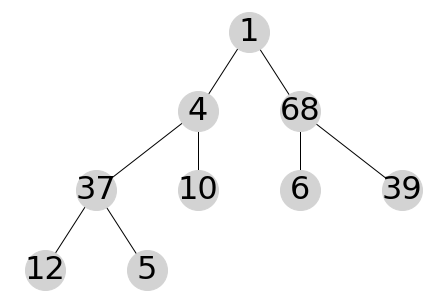

In [8]:
#The list
L = [1,4,68,37,10,6,39,12,5]
# Draw the tree from list L
drawtree(L)

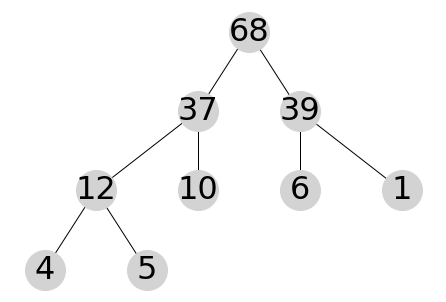

In [9]:
#The list
L = [1,4,68,37,10,6,39,12,5]
#Calling heapSort to max a max heap from the list
heapSort(L)
# Draw the tree from list L
drawtree(L)

<b>
______________________________________________________________________________________________________________________________________________

## Step 2: Switch the root node with the last node, and remove it from the max heap
Since the tree satisfies Max Heap property, then the largest item is stored at the root node. The following are the next actionables:

* Swap the root element with the last element on the tree(nth position) 
* Perform Max Heap on the root element again so that we have the highest element at the root.

It is important to understand that once we put the last node of the Max Heap at the vacant position(the root), it will almost certainly break the Max Heap property of this heap. Therefore, that is why the Max-Heap process must be performed again in order to ensure that throughout the entire heap the parent node of any children nodes is always has a higher value.  

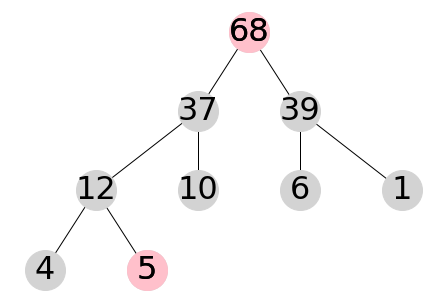

In [10]:
#The original list, before it is turned into a max heap
L = [68, 37, 39, 12, 10, 6, 1, 4, 5]

# Draw the tree from list L
drawtree(L,[68,5])

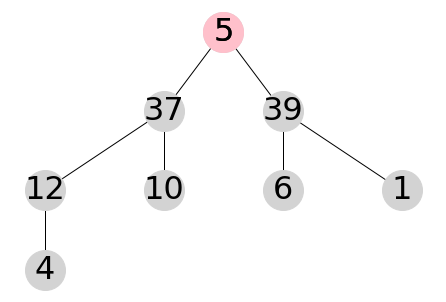

In [11]:
#The original list, before it is turned into a max heap
L = [5, 37, 39, 12, 10, 6, 1, 4]

# Draw the tree from list L
drawtree(L,[5])

This video below shows the process of creating a binary tree from a list of elements. Then, the binary tree is sorted into a max heap. 

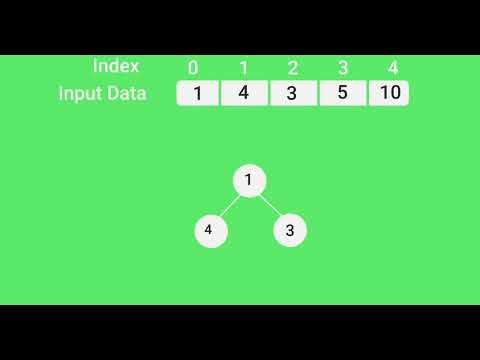

In [12]:
id='qoiajKBX8i4'
YouTubeVideo(id=id,width=800,height=500)

<b>Reference - I created an edited version from the following original video https://www.youtube.com/watch?v=MtQL_ll5KhQ&t=10s

## Heap Sort Code Implementation 

In [13]:
# The previous delcaration of heapsort() contains most of the code needed, we only
# need to add a second for-loop to enable the function to sort the elements.
# The first for-loop sorts the list of elements into a max heap, the second sorts  
# the elements in an ascending order.

def heapSort(arr): 
    # First, we need to get the size(length) of the list being passed down
    n = len(arr) 
  
    # Itterate through the elements and heapify them. The resulting list of elements will be sorted
    # in a max heap fashion.
    for i in range(n, -1, -1): 
        heapify(arr, n, i) 
  
    # One by one extract elements 
    for i in range(n-1, 0, -1): 
        arr[i], arr[0] = arr[0], arr[i] # swap

        #Heapify root element
        heapify(arr, i, 0)   

<b>Reference - https://coderslegacy.com/python/heap-sort-algorithm/ & Dr. Ian McLoughlin <b>

### Driver Code:

In [14]:
#Original list 
L=[1,4,68,37,10,6,39,12,5]
#List Length
n = len(L)

#Output of original list
print("Original list:")
for i in range(n):
  print("%d " % L[i], end='')

#Sorting initiation
start=timer();
heapSort(L)
end=timer();

#Duration calculation
t1=end-start

#Output sorted list
print("\n\n(Heap Sort) Sorted list:")
for i in range(n):
  print("%d " % L[i], end='')

print("\n\nTime to complete: \n", t1)

Original list:
1 4 68 37 10 6 39 12 5 

(Heap Sort) Sorted list:
1 4 5 6 10 12 37 39 68 

Time to complete: 
 5.179099999974568e-05


As can be seen from the output above, the list is sorted and we can see how long it took to complete. A question now arises, how does Heap Sort compare to other sorting algorithm. 

<b>
______________________________________________________________________________________________________________________________________________

# Algorithm Comparison

Tim Sort is a hybrid sorting algorithm, derived from merge sort and insertion sort, designed to perform well in most cases. It is also the built in algorithm to Pythons "sort()" function. Lets compare how long it takes Tim Sort to sort the same list of elements

### Tim Sort Algorithm

In [15]:
#Original List
L2=[1,4,68,37,10,6,39,12,5]
n = len(L2)

#Output of original list
print("Original list:")
for i in range(n):
  print("%d " % L2[i], end='')

#Sorting initiation
start=timer();
L2=sorted(L2)
end=timer();

#Duration calculation
t2=end-start

#Output sorted list
print("\n\n(Tim Sort) Sorted list is:")
for i in range(n):
  print("%d " % L2[i], end='')

print("\n\nTime to complete: \n", t2)

Original list:
1 4 68 37 10 6 39 12 5 

(Tim Sort) Sorted list is:
1 4 5 6 10 12 37 39 68 

Time to complete: 
 3.34579999998752e-05


<b>Reference - https://medium.com/@rylanbauermeister/understanding-timsort-191c758a42f3

<b>
______________________________________________________________________________________________________________________________________________

Lets try one more sorting algorithm. In Selection Sort we start by finding the minimum value in a given list and move it to a sorted list. Then we repeat the process for each of the remaining elements in the unsorted list.

### Selection Sort Algorithm

In [16]:
# Selection sort
def selectionSort(list, size):
    
    #Iterate through the list
    for step in range(size):
        #Set element at minimum index
        min_idx = step
        
        #Compare minimum index element with the next
        for i in range(step + 1, size):  
            if list[i] < list[min_idx]:
                min_idx = i
     
        # After each iteration, minimum is placed in the front of the unsorted list
        (list[step], list[min_idx]) = (list[min_idx], list[step])

### Driver Code

In [17]:
#Original List
L3=[1,4,68,37,10,6,39,12,5]
n = len(L3)

#Output of original list
print("Original list:")
for i in range(n):
  print("%d " % L3[i], end='')

#Sorting initiation
start=timer();
selectionSort(L3,n)
end=timer();

#Duration calculation
t3=end-start

#Output sorted list
print("\n\n(Selection Sort) Sorted list is:")
for i in range(n):
  print("%d " % L3[i], end='')

print("\n\nTime to complete: \n", t3)

Original list:
1 4 68 37 10 6 39 12 5 

(Selection Sort) Sorted list is:
1 4 5 6 10 12 37 39 68 

Time to complete: 
 4.0165999999786095e-05


<b>Reference - https://www.programiz.com/dsa/selection-sort

<b>
______________________________________________________________________________________________________________________________________________

## Results

In [18]:
print("Heap Sort\n",t1)
print("\nTim Sort\n",t2)
print("\nSelection Sort\n",t3)

Heap Sort
 5.179099999974568e-05

Tim Sort
 3.34579999998752e-05

Selection Sort
 4.0165999999786095e-05


As we can see, Heap Sort took the longest at 5.76, both Selection Sort and Tim Sort were very close at 3.446 and 3.441 respectively. Please note, the above values are approximations and are expected to vary slightly when re-compiled. 

<b>
______________________________________________________________________________________________________________________________________________

# Computational complexity of Heap Sort.


## Time complexity of Heap Sort.


To explain the computational complexity of an algorithm we must us Big O notation. At its most basic level, Big O notation defines how long it takes an algorithm to run, also called time complexity. It represents how long the runtime for a given algorithm can be as the data grows larger. 


You may be wondering why anyone cares enough to calculate the speed of an algorithm except to show off, but as programs grow in size, these tiny milliseconds add up. Suddenly an algorithm that used to take no time at all starts to bog everything down, so programmers need to know what the “worst-case scenario” is, or rather, the slowest an algorithm will run given a growing list of data. 

The following chart is a good reference for the different levels of complexity in Big O:

![Complexity](https://he-s3.s3.amazonaws.com/media/uploads/317c55e.png)
<b> Reference - https://www.hackerearth.com/practice/notes/sorting-and-searching-algorithms-time-complexities-cheat-sheet/

To understands the time complexity of Heap Sort, we need to break down each part of the computational steps and evaluate their individual complexity.


First, we build a max heap from the array, which requires <b>O(n)</b> time if implemented optimally. O(n) means that the run time increases at the same pace as the input. 

Why? Building a max heap takes an array of unsorted items and moves them until they all satisfy the heap property, thereby producing a valid max-heap. In our case, The number of times a node may need to be moved is proportional to the distance between nodes. In other words, it totally depends on the overall height of the heap. In the worst case it would go down to the leaf nodes.


The next stage is to repeatedly delete the largest item in the heap and put it at the end of the array. The complexity of removing the biggest valued node (after being swapped down from the root) for a heap is <b>O(log n)</b>. 
 
It is typically implemented by removing the root (which contains the highest node value) and replacing it with the last node in the heap, which is a leaf, and therefore one of the smallest nodes. This new root will almost certainly violate the heap property, so you have to build a max heap again until you move it back into an acceptable position. This also has the effect of moving the next largest item up to the root. 


In summary, the work for heap sort is the sum of the two stages: Building the max heap and removing each node in order. Building the max-heap from the unsorted list requires O(n) calls to the build max heap function, each of which takes O(logn) time. Thus, the overall time complexity of heap sort is <b>O(nlogn)</b> in the worst case.

<b> Reference - https://brilliant.org/wiki/heap-sort/ & https://www.geeksforgeeks.org/heap-sort/ & https://www.happycoders.eu/algorithms/heapsort/

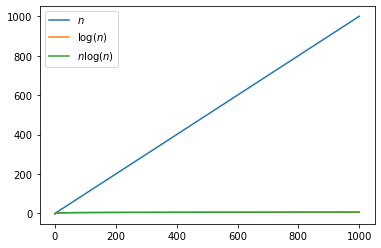

In [19]:
n = np.arange(0.1, 1000.1, 0.1)

y1 = n
y2 =  np.log(n)
y3 = n * np.log(n)

plt.plot(n, y1, label='$n$')
plt.plot(n, y2, label='$ \log(n)$')
plt.plot(n, y2, label='$n \log(n)$')

plt.legend()

## Space complexity of Heap Sort.


So far, we have only been discussing the time complexity of the algorithms. That is, we only care about how much time it takes for the program to complete the task. 

The space complexity of a sorting algorithem is related to how much memory the program will use, and therefore is also an important factor to analyze. With Heap sort, Memory usage is minimal because apart from what is necessary to hold the initial list of items to be sorted, it needs no additional memory space to work. Heap Sort requires a constant space complexity of O(1). O(1) means that the space required by the algorithm to process data is constant

For reference, the below chart lists the space and time complexities for some of the most common sorting algorithems:

![Complexity2](https://lamfo-unb.github.io/img/Sorting-algorithms/Complexity.png)
<b> Reference - https://lamfo-unb.github.io/2019/04/21/Sorting-algorithms/

# How Graph Theory is used for Heap Sort

Graph Theory is a widely-used concept for visualizing two basic components: nodes and edges. It is focused on the relationship between thse two components. It has become a powerful means of modelling and capturing data in concepts such as algorithms. If you have a set of objects that are related to each other, then you can represent them using a graph. The nature of their abstract structure makes them endlessly versatile in almost any context. 

A graph is represented by a set of vertices (V) or nodes linked at edges (E). The number of edges you have depends on the vertices. The edges may be directed or undirected. In a directed graph, the nodes are linked in one direction. The edges here show a one-way relationship. In an undirected graph, the edges are bi-directional, showing a two-way relationship.

![graph](https://miro.medium.com/max/1400/1*svRJuhJP2S9Ek4O_lNEKRg.png)

Throughout this notebook, we faced multiple aspects which were represeted using graphs. First we used graphs to represent an unsorted list of elements into a binary tree. When we then worked on creating a max heap from the binary tree, graphs were used to represet the before and after. We used them to illaborate on the logic of being able to find a nodes children from the parent.

We were able to very clearly understand the changes that took place on the data structure itself throughout the entire process of Heap Sort. Including swapping out the root element for the leaf. Being able to visually explain the relationship through Graph Theory offers significant support to understanding a problem and its solution.

Furthermore, Graph Theory gives us a means to more easily solve complext problems by expressing them in a more reasonable form. Route planning is a very common real world problem where graph theory is a particularly useful tool. The link below includes a very in depth explination of a common issue and its solution using graph Theory. 

<b> Reference - https://towardsdatascience.com/what-is-graph-theory-and-why-should-you-care-28d6a715a5c2#:~:text=Graph%20Theory%20is%20ultimately%20the,moving%20parts%20of%20dynamic%20systems.